In [1]:
from statsmodels.tsa.statespace.varmax import VARMAX
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import random

In [2]:
cols = ['v1', 'v2']
lst = []
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1,v2]
    lst.append(row)
    
df = pd.DataFrame(lst, columns=cols)
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
v1    100 non-null float64
v2    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


,v1,v2
97,0.023646,0.941460
98,0.353059,0.483105
99,0.418206,1.151123


In [3]:
model = VARMAX(df.values.tolist(), order=(1,1))
model_fit = model.fit(disp=False)

y = pd.DataFrame(model_fit.forecast(), columns=cols)
y.loc[100] = y.loc[0]
y.loc[99] = df.loc[99]
y.loc[0] = [np.nan, np.nan]
y.tail(3)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


,v1,v2
0,NaN,NaN
100,0.518711,0.961162
99,0.418206,1.151123


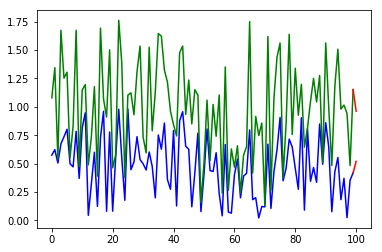

In [5]:
plt.plot(df['v1'], 'b')
plt.plot(df['v2'], 'g')

plt.plot(y.tail(2), 'r')

plt.show()

In [10]:
model_fit.summary()

Dep. Variable:,"['y1', 'y2']",No. Observations:,100
Model:,"VARMA(1,1)",Log Likelihood,-32.332
,+ intercept,AIC,90.664
Date:,"Sat, 01 Sep 2018",BIC,124.531
Time:,21:25:31,HQIC,104.370
Sample:,0,,
,- 100,,
Covariance Type:,opg,,
Ljung-Box (Q):,"33.31, 37.15",Jarque-Bera (JB):,"3.53, 6.67"
Prob(Q):,"0.76, 0.60",Prob(JB):,"0.17, 0.04"
Heteroskedasticity (H):,"1.15, 1.03",Skew:,"0.00, -0.05"
